# MediaPipe

See https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models

See and [this notebook](https://github.com/googlesamples/mediapipe/blob/main/examples/pose_landmarker/python/%5BMediaPipe_Python_Tasks%5D_Pose_Landmarker.ipynb)


In [1]:
!pip install -q mediapipe


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# On linux and colab:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

# Windows:
#!powershell.exe Invoke-WebRequest -Uri "https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task" -OutFile "pose_landmarker.task"
#!powershell.exe Invoke-WebRequest -Uri "https://th.bing.com/th/id/R.655322a30501ba490234dc97e0dd2c13?rik=JTIFv9sJ8v%2bhvQ&riu=http%3a%2f%2f4.bp.blogspot.com%2f-lKnJkjW2JW0%2fT8rXbHB21NI%2fAAAAAAAAIfc%2fH6dk_szSXE4%2fs1600%2fLebron%2bJames_2.jpg&ehk=igE97DF2wIjJFXHCYAMDdgBLrNz4KPxL5SUlvpZv%2fN0%3d&risl=&pid=ImgRaw&r=0" -OutFile "image.jpg"


In [3]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

import numpy as np
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style()
    )
  return annotated_image

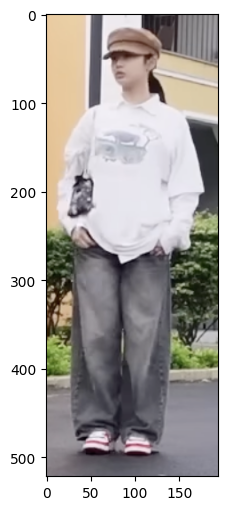

In [4]:
import cv2
from pylab import subplots

img = cv2.imread('pham_front.png')
cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axs = subplots(1, 1, figsize=(12,6))
axs.imshow(cvt_img, interpolation=None)

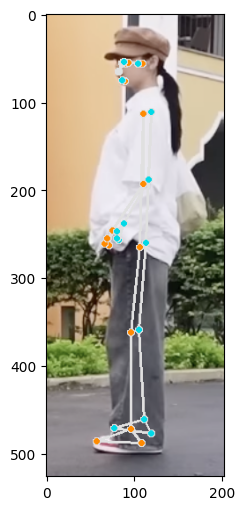

In [7]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("pham_side.png")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)


fig, axs = subplots(1, 1, figsize=(12,6))
axs.imshow(annotated_image, interpolation=None)


[NormalizedLandmark(x=0.42817455530166626, y=0.11204659938812256, z=-1.1683204174041748, visibility=0.9999328851699829, presence=0.9999487400054932), NormalizedLandmark(x=0.4660097062587738, y=0.09421578049659729, z=-1.1079350709915161, visibility=0.9998352527618408, presence=0.9998952150344849), NormalizedLandmark(x=0.48949679732322693, y=0.09375572204589844, z=-1.1092227697372437, visibility=0.9998291730880737, presence=0.999907374382019), NormalizedLandmark(x=0.509130597114563, y=0.09361553192138672, z=-1.1089152097702026, visibility=0.9998661279678345, presence=0.9998865127563477), NormalizedLandmark(x=0.42240631580352783, y=0.0965036153793335, z=-1.0593572854995728, visibility=0.999874472618103, presence=0.9998583793640137), NormalizedLandmark(x=0.41307759284973145, y=0.09746333956718445, z=-1.060916781425476, visibility=0.9999003410339355, presence=0.9998874664306641), NormalizedLandmark(x=0.4036242365837097, y=0.0979216992855072, z=-1.0617923736572266, visibility=0.9999178647994

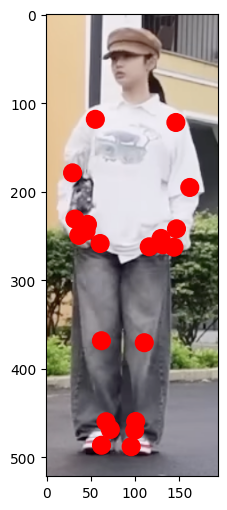

In [6]:
import matplotlib.pyplot as plt

# 12, 14, 16
keys = {
    'shoulder': 12,
    'elbow': 14,
    'wrist': 16
}

landmarks = detection_result.pose_landmarks[0]

print(landmarks)

width = img.shape[1]
height = img.shape[0]

fig, axs = subplots(1, 1, figsize=(12,6))

for i in range(11, 33):
    part = landmarks[i]
    part_pos = np.array([part.x, part.y, part.z])
    pos = (part_pos[0] * width, part_pos[1] * height)
    axs.add_patch((plt.Circle(pos, 10, color='r')))

# shoulder = landmarks[keys['shoulder']]
# elbow = landmarks[keys['elbow']]
# wrist = landmarks[keys['wrist']]
# 
# shoulder = np.array([shoulder.x, shoulder.y, shoulder.z])
# elbow = np.array([elbow.x, elbow.y, elbow.z])
# wrist = np.array([wrist.x, wrist.y, wrist.z])
# 
# # a.b = |a||b|cos\theta
# 
# v1 = shoulder-elbow
# v1 = v1 / np.sqrt((v1**2).sum())
# v2 = wrist - elbow
# v2 = v2 / np.sqrt((v2**2).sum())
# 
# angle = (np.arccos(np.dot(v1, v2)) / (2*np.pi)) * 360.
# 
# 
# fig, axs = subplots(1, 1, figsize=(12,6))
# 
# shoulder_img_pos = (shoulder[0]*width, shoulder[1]*height)
# elbow_img_pos = (elbow[0]*width, elbow[1]*height)
# wrist_img_pos = (wrist[0]*width, wrist[1]*height)
# 
# axs.add_patch((plt.Circle(shoulder_img_pos, 20, color='r')))
# axs.add_patch((plt.Circle(elbow_img_pos, 20, color='r')))
# axs.add_patch((plt.Circle(wrist_img_pos, 20, color='r')))
# 
# axs.add_patch((plt.Arrow(wrist_img_pos[0], wrist_img_pos[1], elbow_img_pos[0]-wrist_img_pos[0], elbow_img_pos[1]-wrist_img_pos[1], color='b')))
# axs.add_patch((plt.Arrow(shoulder_img_pos[0], shoulder_img_pos[1], elbow_img_pos[0]-shoulder_img_pos[0], elbow_img_pos[1]-shoulder_img_pos[1], color='b')))

# plt.text(elbow_img_pos[0]-20, elbow_img_pos[1]-10, "{0:.2f}".format(angle))

cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axs.imshow(cvt_img, interpolation=None)


In [ ]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
fig, axs = subplots(1, 1, figsize=(12,6))
axs.imshow(visualized_mask, interpolation=None)

# YOLO

This section uses yolo models for pose detection. The goal is to explore various pretrained models to observe their similarities and differences.


## YoloV8
https://docs.ultralytics.com/tasks/pose/
https://docs.ultralytics.com/modes/predict/#probs

In [ ]:
!pip install -q ultralytics

In [ ]:
# YOLOv8

from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-pose.pt")  # load a pretrained model (recommended for training)

# Use the model
imgs = ['pham_front.png']  # batch of images
# imgs = ['pham_side.png']  # batch of images

results = model(imgs)  # predict on an image

In [ ]:
from PIL import Image
from pylab import subplots

fig, axs = subplots(1, len(results), figsize=(12,6), squeeze=False)

# Show the results
for i, r in enumerate(results):
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    axs[0,i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    axs[0,i].imshow(im, interpolation=None)

In [ ]:
r.boxes

In [ ]:
r.keypoints

In [ ]:
r.plot()